# Analysis of real-estate market

In this training example we have data provided with Yandex.Real-estate service covering sale announcements from Saint-Petersburg and Leningradskaya region.
**The task** is to predict the price using exploratory analysis techniques, for this purpose we should found target parametrs which have strong impact on the price.
This is also important since data outliers can indicate fraud.
In general, all the data can be separated in two parts - one provided by users, and one generated automatically, for example distance to a park, city center, etc.

## Data preprocessing
### Facing the data

In [1]:
# Import of necessary libriries
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

,21023,21781,6668,15499,22861,17419,15920,6249,3826,5323
total_images,17,7,1,3,7,12,4,14,6,2
last_price,124350000.0,12303979.0,2999000.0,3600000.0,2120000.0,3400000.0,3830000.0,3650000.0,8300000.0,4626540.0
total_area,248.7,88.0,55.0,37.33,82.9,50.9,37.38,40.0,71.1,38.24
first_day_exposition,2015-08-27T00:00:00,2017-03-21T00:00:00,2017-06-20T00:00:00,2018-03-23T00:00:00,2017-02-10T00:00:00,2019-01-22T00:00:00,2018-10-05T00:00:00,2019-02-26T00:00:00,2018-12-13T00:00:00,2018-08-03T00:00:00
rooms,4,3,3,1,1,2,1,1,2,1
ceiling_height,3.4,NaN,NaN,NaN,NaN,2.8,NaN,2.7,2.85,2.55
floors_total,9.0,19.0,5.0,12.0,5.0,5.0,27.0,12.0,25.0,25.0
living_area,131.0,54.0,40.0,17.7,25.0,29.4,14.6,20.5,37.2,17.87
floor,4,8,1,4,3,1,23,4,8,1
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


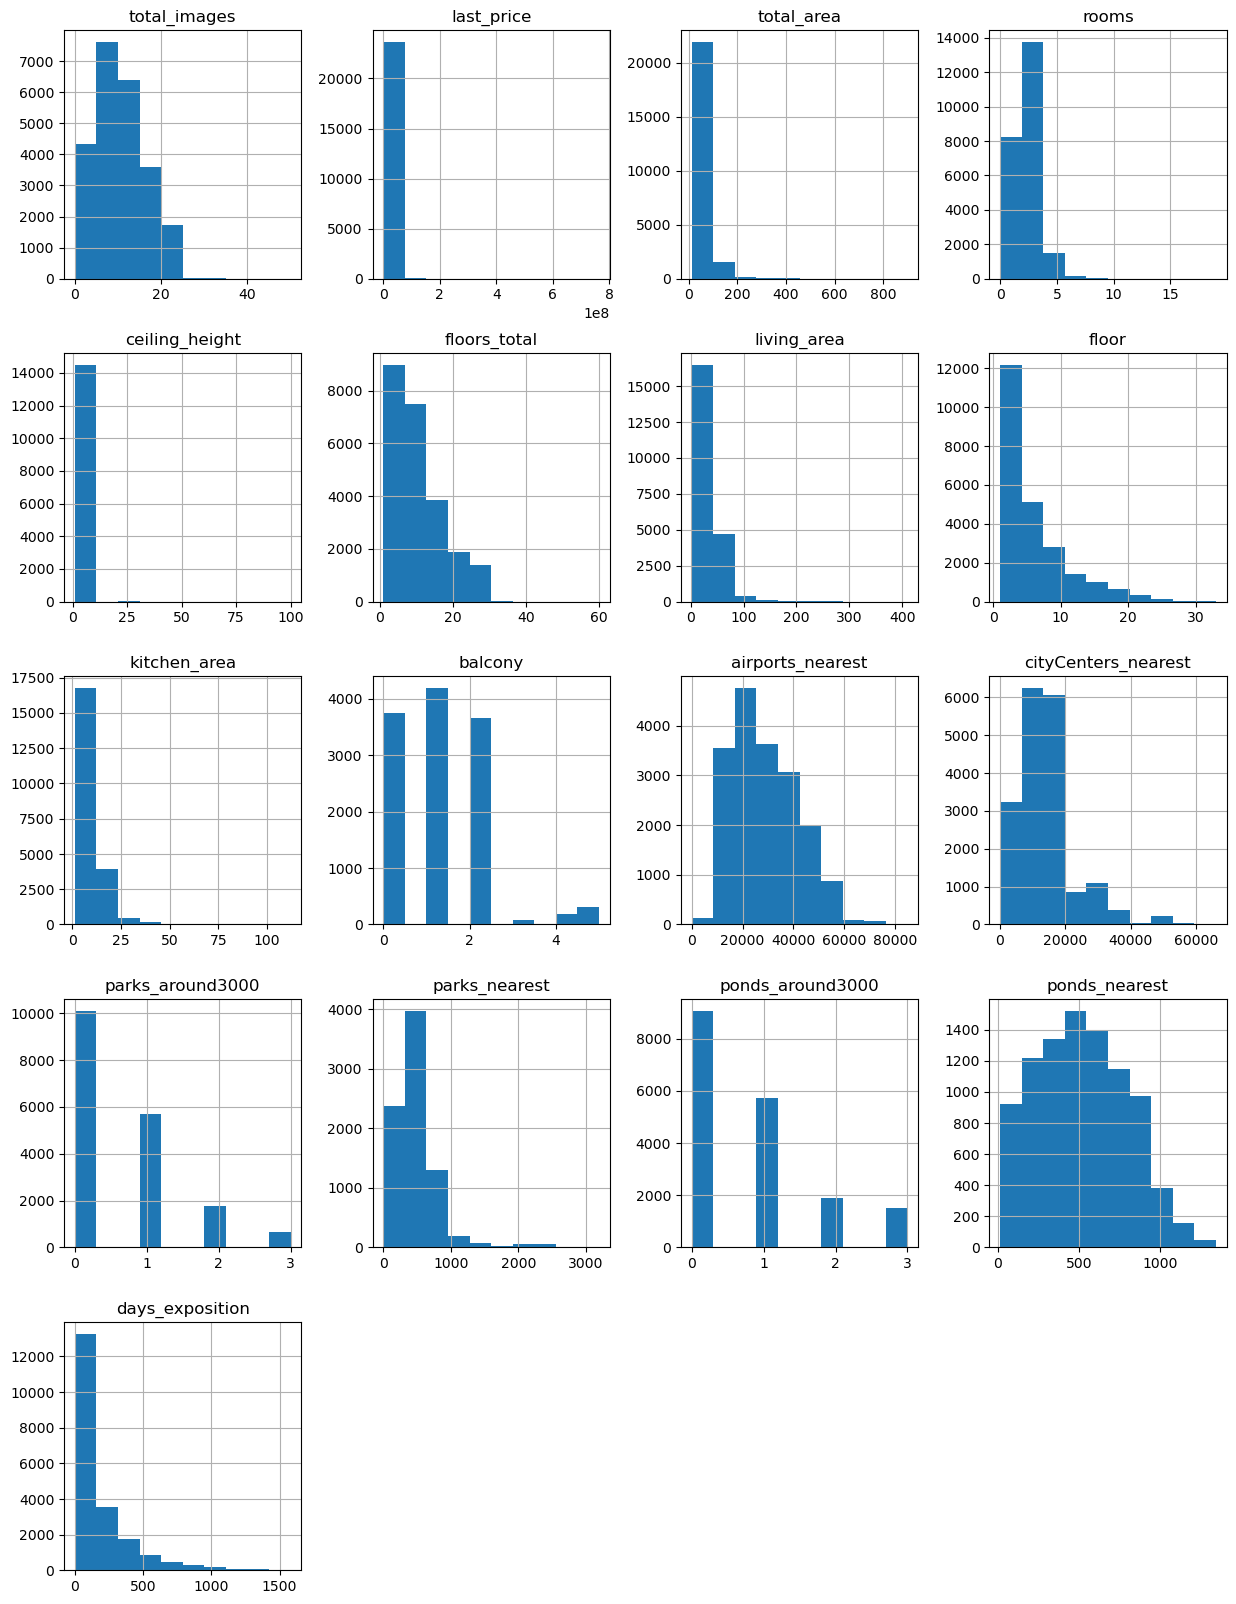

In [2]:
# Upload the data
df = pd.read_csv(r'C:\Users\Ivan\datasetsYP\real_estate_data.csv', sep='\t')

# Take a look on what is available
display(df.sample(10).T)
df.info()
display(df.describe().T)
df.hist(figsize=(15, 20));

**Summary** According to histrograms there are no extreme outliers, however there are values which are far from the mean values (e.g. total_area = 900).  
There are also many missing values, which will be discussed closely in the next chapter.

**Data description**  
airports_nearest — distance to the closest airport (meters)  
balcony — number of balconies  
ceiling_height — ceiling height (meters)  
cityCenters_nearest — distance to the city center (meters)  
days_exposition — days from publication of announcement until it was removed  
first_day_exposition — publication date  
floor — floor of the apartment  
floors_total — floors in total  
is_apartment — if it is an apartment (legally different type of real estate)  
kitchen_area — kitchen area (meters²)  
last_price — price when the announcement was removed  
living_area — living area (meters²)  
locality_name — name of city/town  
open_plan — if the apartment layout can be easily changed  
parks_around3000 — number of parks in 3 km radius 
parks_nearest — distance to the closest park (meters)  
ponds_around3000 — number of ponds in 3 km radius  
ponds_nearest — distance to the closest pond (meters)  
rooms — number of rooms  
studio — if the flat is studio  
total_area — total area (meters²)  
total_images — number of pictures of property in the announcement  

### Missing values
We will start data pre-processing by getting rid of missing values.

In [3]:
# Creating a list with columns with missing values
list_columns_with_nan = df.columns[df.isnull().any()]
print(f'There are missing values in the folowing columns: {list_columns_with_nan}')

There are missing values in the folowing columns: Index(['ceiling_height', 'floors_total', 'living_area', 'is_apartment',
       'kitchen_area', 'balcony', 'locality_name', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition'],
      dtype='object')


Qunatitative data which can be fitted with median values: ceiling_height, floors_total, living_area, kitchen_area, cityCenters_nearest.
is_apartement - many entries are missing, while False is common, there are no entries with True. Thus, we can assume that NaN values should be replaced with True.
balcony - we can assume that if they were not counted, there are no balconies at the apartment, thus Nan values will be filled with 0. The same logic can be applied to parks_around3000 и ponds_around3000.
locality_name - is a categorical value, which is hard to recall, can be replaced with space sign.
parks_nearest, ponds_nearest, airports_nearest are a bit trikier since the destribution of this values is far from simple. If we take a closer look on data, it appears that missing values are related to place where park or pond are not around, so we can leave this values missing.
days_of_exposition - seems that if this values is missing then the announcement is still active

In [4]:
# Remove rows with many missing values
df = df.dropna(thresh=11)
df.info()
"""
With treshold 11 (more then half of data is missing) only 17 objects were removed. However,with treshold 6 
more then half rows can be removed from the dataset, which in general indicates low quality of the data.
"""

# Filling NaN values for ceiling height, floors total and distance till city center with mean values
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].mean())
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].mean())

# For living and kitchen area it is possible to fill NaN values multiplying avarage ratio
# of this areas to total area by total area of the object
df['living_area'] = df['living_area'].fillna(
                    df['total_area'] * (df['living_area'].mean()) / (df['total_area'].mean())
)
df['kitchen_area'] = df['kitchen_area'].fillna(
                     df['total_area'] * (df['kitchen_area'].mean()) / (df['total_area'].mean())
)

# Column on type of real estate
df['is_apartment'] = df['is_apartment'].fillna(True)

# Balconies
df['balcony'] = df['balcony'].fillna(0)

# Locality name
df['locality_name'] = df['locality_name'].fillna('')

# Checking how data looks now
display(df.sample(10))
df.info()
# Checking which naN valeus are still in there 
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23682 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23682 non-null  int64  
 1   last_price            23682 non-null  float64
 2   total_area            23682 non-null  float64
 3   first_day_exposition  23682 non-null  object 
 4   rooms                 23682 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23602 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23682 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23682 non-null  bool   
 11  open_plan             23682 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23633 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1421,17,3600000.0,31.7,2017-04-14T00:00:00,1,2.771499,9.0,15.200000,5,True,...,8.000000,0.0,Санкт-Петербург,47001.0,15146.000000,0.0,NaN,0.0,NaN,67.0
16570,10,5950000.0,74.6,2017-09-18T00:00:00,3,2.771499,17.0,46.000000,11,True,...,11.300000,0.0,Санкт-Петербург,33662.0,14761.000000,0.0,NaN,1.0,320.0,118.0
19128,5,2500000.0,50.0,2018-03-06T00:00:00,2,2.500000,5.0,31.000000,5,True,...,8.000000,1.0,Кингисепп,NaN,14191.277833,NaN,NaN,NaN,NaN,182.0
17796,8,2550000.0,43.0,2018-11-26T00:00:00,2,2.500000,3.0,26.000000,3,True,...,5.000000,0.0,посёлок городского типа Кузьмоловский,NaN,14191.277833,NaN,NaN,NaN,NaN,60.0
4720,18,4250000.0,36.0,2017-11-22T00:00:00,1,2.771499,19.0,16.000000,12,True,...,10.200000,2.0,Санкт-Петербург,28959.0,10890.000000,1.0,212.0,0.0,NaN,27.0
7332,0,7600000.0,112.0,2016-04-18T00:00:00,4,2.771499,15.0,87.000000,4,False,...,12.000000,1.0,Санкт-Петербург,50874.0,14886.000000,0.0,NaN,0.0,NaN,101.0
18313,18,9900000.0,73.0,2018-01-15T00:00:00,2,3.000000,4.0,27.000000,2,True,...,26.000000,0.0,Санкт-Петербург,25808.0,4382.000000,1.0,510.0,0.0,NaN,449.0
3454,10,5000000.0,62.4,2018-09-04T00:00:00,2,2.700000,5.0,31.800000,1,True,...,12.600000,2.0,Гатчина,NaN,14191.277833,NaN,NaN,NaN,NaN,NaN
2936,16,8350000.0,77.0,2019-04-18T00:00:00,3,2.700000,14.0,41.400000,3,True,...,11.300000,0.0,Санкт-Петербург,33976.0,12217.000000,0.0,NaN,0.0,NaN,NaN
4427,9,4390000.0,38.1,2018-02-01T00:00:00,1,2.771499,25.0,21.757403,7,True,...,6.673996,0.0,Санкт-Петербург,17580.0,15048.000000,2.0,468.0,0.0,NaN,39.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23682 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23682 non-null  int64  
 1   last_price            23682 non-null  float64
 2   total_area            23682 non-null  float64
 3   first_day_exposition  23682 non-null  object 
 4   rooms                 23682 non-null  int64  
 5   ceiling_height        23682 non-null  float64
 6   floors_total          23682 non-null  float64
 7   living_area           23682 non-null  float64
 8   floor                 23682 non-null  int64  
 9   is_apartment          23682 non-null  bool   
 10  studio                23682 non-null  bool   
 11  open_plan             23682 non-null  bool   
 12  kitchen_area          23682 non-null  float64
 13  balcony               23682 non-null  float64
 14  locality_name         23682 non-null  object 
 15  airports_nearest   

**Summary**  Remaining missing values are related to cartographical data.  
In general, it can be concluded that quality of the data is rather poor.

### Data types
There are several mismatching datatypes in the dataset.  
Several columns with floor type, can be changed to int:  
 balcony,  floors_total.
first_day_exposition should be in datetime

In [5]:
# Float to int
df['balcony'] = df['balcony'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)

# Date to datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Checking changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23682 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23682 non-null  int64         
 1   last_price            23682 non-null  float64       
 2   total_area            23682 non-null  float64       
 3   first_day_exposition  23682 non-null  datetime64[ns]
 4   rooms                 23682 non-null  int64         
 5   ceiling_height        23682 non-null  float64       
 6   floors_total          23682 non-null  int32         
 7   living_area           23682 non-null  float64       
 8   floor                 23682 non-null  int64         
 9   is_apartment          23682 non-null  bool          
 10  studio                23682 non-null  bool          
 11  open_plan             23682 non-null  bool          
 12  kitchen_area          23682 non-null  float64       
 13  balcony         

### Duplicated
First let's check duplicates in names of towns/cities.

In [6]:
print(f"Total unique names: {df['locality_name'].nunique()}")
print(df['locality_name'].unique())


Total unique names: 365
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый

It seems that there are few duplciates related to usage of letter 'ё'. It is possible to replace it everywhere with related letter 'e'. By this 34 pairs of duplicates can be removed.

In [7]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
print(f"Unique names after letter replacement: {df['locality_name'].nunique()}")

Unique names after letter replacement: 331


In [8]:
# Checking for full duplicates in the dataset (and their ammount)
if not (df.duplicated().sum()):
    print('No full duplicates')
else:
    print(f"Full duplicated in dataset: {df.duplicated().sum()}")  

No full duplicates


### Data outliners

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23682.0,9.861076e+00,5.683594e+00,0.0,6.0,9.000000e+00,1.400000e+01,50.0
last_price,23682.0,6.538969e+06,1.088790e+07,12190.0,3400000.0,4.650000e+06,6.796750e+06,763000000.0
total_area,23682.0,6.034011e+01,3.564260e+01,12.0,40.0,5.200000e+01,6.990000e+01,900.0
rooms,23682.0,2.071067e+00,1.078393e+00,0.0,1.0,2.000000e+00,3.000000e+00,19.0
ceiling_height,23682.0,2.771499e+00,9.868774e-01,1.0,2.6,2.771499e+00,2.771499e+00,100.0
floors_total,23682.0,1.067194e+01,6.587223e+00,1.0,5.0,9.000000e+00,1.600000e+01,60.0
living_area,23682.0,3.458971e+01,2.235046e+01,2.0,19.0,3.000000e+01,4.210000e+01,409.7
floor,23682.0,5.891014e+00,4.885720e+00,1.0,2.0,4.000000e+00,8.000000e+00,33.0
kitchen_area,23682.0,1.050488e+01,6.037855e+00,1.3,7.0,9.000000e+00,1.200000e+01,112.0
balcony,23682.0,5.915041e-01,9.595116e-01,0.0,0.0,0.000000e+00,1.000000e+00,5.0


There are no negative values which is already a good start.
Maximum values for most of the columns are making sence. Yet not for the celling height (100 meters).
A closer look on this column provide additional insides. In total there are 26 entries like this, while 10 meters ceiling can make sence, values more then 20 are not and probably were related to wriring down this values in cm.

In [10]:
# For values for which we propsoe mistake in cm/m:
df.loc[df['ceiling_height'] > 20,'ceiling_height'] /= 10

# For two high cellings which maybe real values, yet outliners, let's replace it with Nan
print('Too high celling count:', df.loc[df['ceiling_height'] > 7, 'ceiling_height'].count())
df.loc[df['ceiling_height'] > 7, 'ceiling_height'] = float('NaN')

print(df.loc[df['ceiling_height'] > 7, 'ceiling_height'].count())

Too high celling count: 8
0


For outliners in total_area, price, and rooms we can also delete, as those are specific cases and it is better to exclude them from general analysis.

In [11]:
df = df.loc[df['total_area'] <= 300]
df = df.loc[df['last_price'] <= 30000000]
df = df.loc[df['rooms'] <= 10]

### Summary on data pre-processing
There are many missing values in data. Most of them it was possible to replace (for quntitative data).
Duplicates in locality name were removed, as well as outliners in total_area, price and rooms number.
The data is ready for analysis.

## Exploratory analysis

### Generating additional data

In [12]:
# Price per squer metter
df['meter_price'] = df['last_price'] / df['total_area']

# Day of publication (0 - Monday, 1 -Tuesday, etc)
df['day'] = df['first_day_exposition'].dt.dayofweek

# Month of publication
df['month'] = df['first_day_exposition'].dt.month

# Year of publication
df['year'] = df['first_day_exposition'].dt.year

# Floor type (first, last, other)
df['floor_description'] = df.apply(
    lambda row: 'first' if row['floor'] == 1
    else 'last' if row['floor'] == row['floors_total']
    else 'other', axis=1)

# Distancy to city center by km
df['city_center_km'] = (df['cityCenters_nearest'] / 1000).round().astype(int)

display(df.head().T)

,0,1,2,4,5
total_images,20,7,10,2,10
last_price,13000000.0,3350000.0,5196000.0,10000000.0,2890000.0
total_area,108.0,40.4,56.0,100.0,30.4
first_day_exposition,2019-03-07 00:00:00,2018-12-04 00:00:00,2015-08-20 00:00:00,2018-06-19 00:00:00,2018-09-10 00:00:00
rooms,3,1,2,2,1
ceiling_height,2.7,2.771499,2.771499,3.03,2.771499
floors_total,16,11,5,14,12
living_area,51.0,18.6,34.3,32.0,14.4
floor,8,1,4,13,5
is_apartment,True,True,True,True,True


### Data analysis

### Parametrs analysis

In [13]:
def parametr_analysis (df, index, binsn=10, range_maxi=100):
    """
    Function for simple plotting column by column
    """
    print(f'Analysis of {index}')
    df.boxplot(column=index)
    plt.show()
    df[index].hist(bins = binsn, range=(0, range_maxi))
    plt.show()
    print(df[index].describe())
      

Analysis of total_area


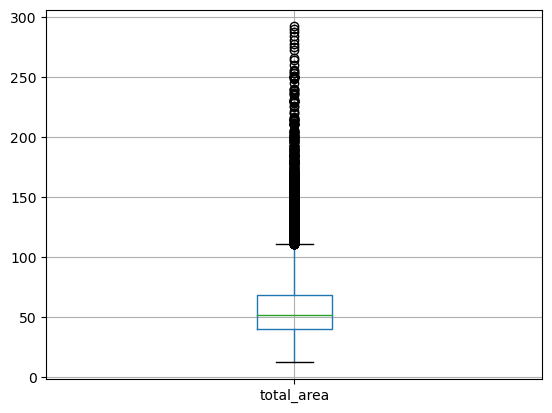

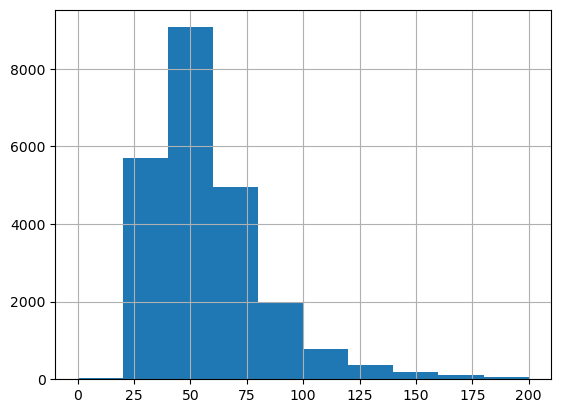

count    23351.000000
mean        58.090941
std         27.309669
min         12.000000
25%         40.000000
50%         51.500000
75%         68.300000
max        292.200000
Name: total_area, dtype: float64


In [14]:
parametr_analysis (df, 'total_area', range_maxi=200)

**Total area** is grouped around median value (52 sqm), with narrow scattering (50% are in +- 15 interval).  
However, tail of histrogram is rather long related to luxury appartement and houses in countryside.

Analysis of living_area


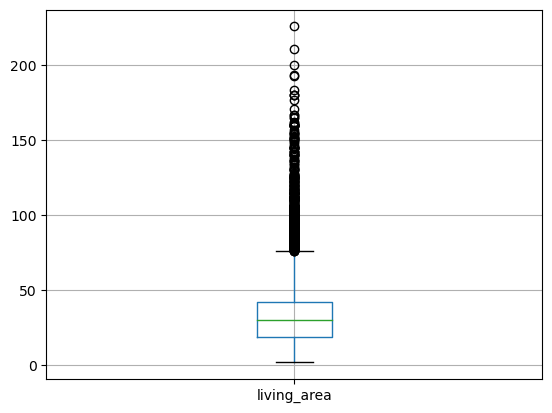

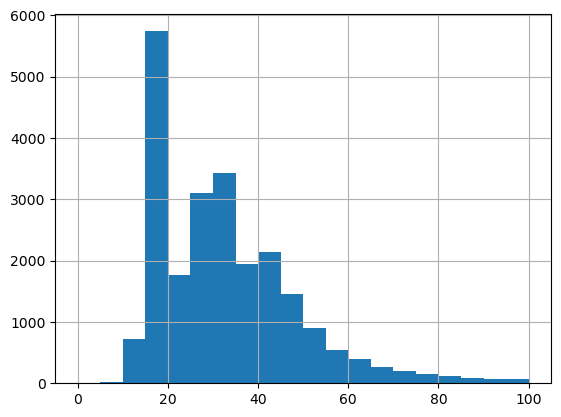

count    23351.000000
mean        33.323653
std         17.997501
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        225.900000
Name: living_area, dtype: float64


In [15]:
parametr_analysis (df, 'living_area', binsn=20)

**Living area** Two maxima can be claearly distinguished. It can be either a mistake with filling the information up (part of announcements indicated living area as total area - kitchen area, and part as only living area itself), or can be related to two trends on apartments design.

Analysis of kitchen_area


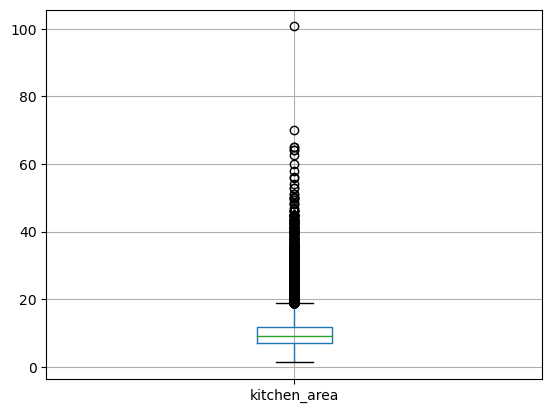

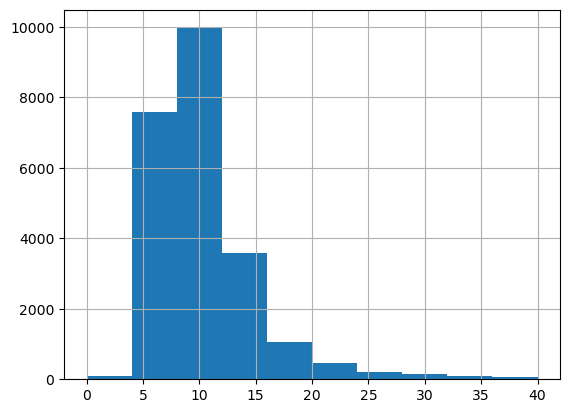

count    23351.000000
mean        10.226449
std          5.147634
min          1.300000
25%          7.000000
50%          9.000000
75%         11.736423
max        100.700000
Name: kitchen_area, dtype: float64


In [16]:
parametr_analysis (df, 'kitchen_area', range_maxi=40)

**Kitchen area** has unifrom distribution related to total area distribution. Most of the values are located near median (10 sqm). Tail is present but not that pronounced, probably due to the fact that kitchens with 30+ sqm area does not make much sence.

Analysis of last_price


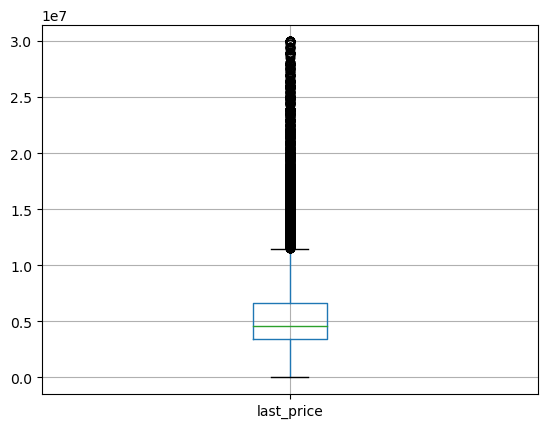

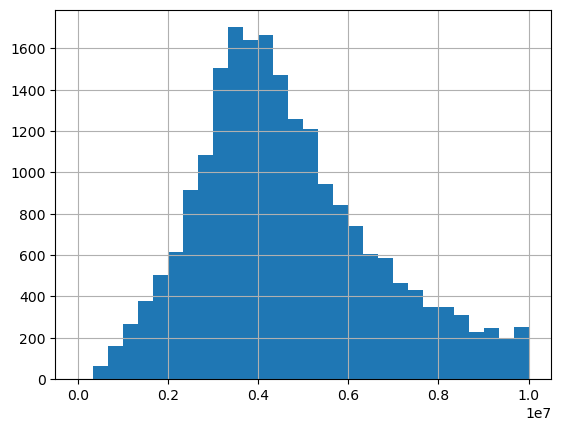

count    2.335100e+04
mean     5.727834e+06
std      4.005018e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.644500e+06
max      3.000000e+07
Name: last_price, dtype: float64


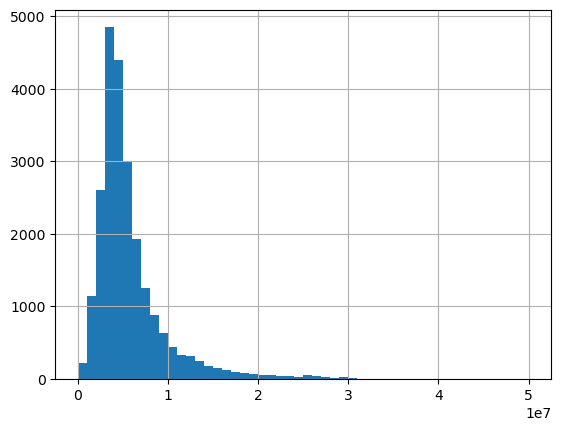

In [17]:
parametr_analysis (df, 'last_price', binsn=30, range_maxi = 10000000)
df['last_price'].hist(bins = 50, range=(0, 50000000))
plt.show()

**Last price** Median price is 4.6 million rubles. Distribution has a long tail after 10 million related to luxury apartments.

Analysis of rooms


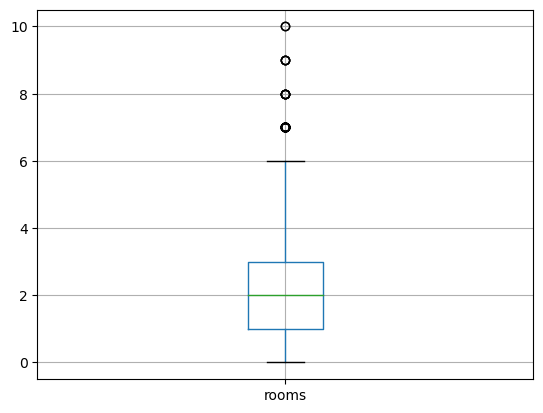

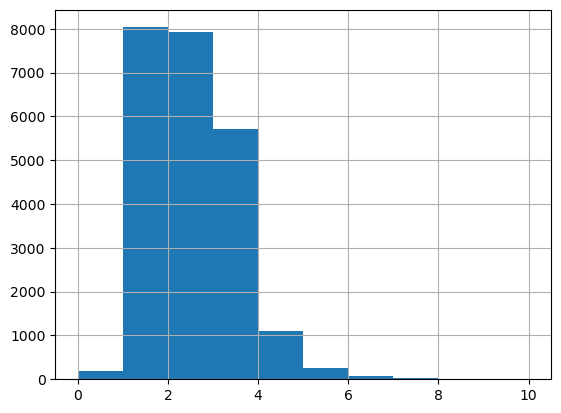

count    23351.000000
mean         2.036872
std          1.013004
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64


In [18]:
parametr_analysis (df, 'rooms', range_maxi = 10)

**Room numbers** has a very narrow distribution, in fact, in most of the annoncements describe there are 1-3 rooms.

Analysis of ceiling_height


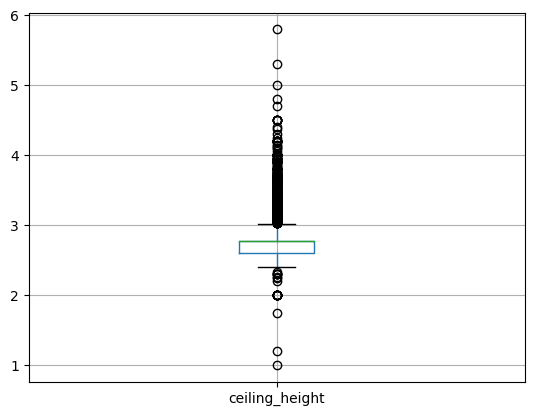

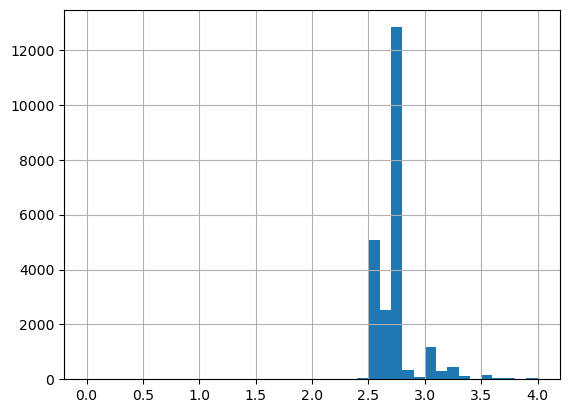

count    23343.000000
mean         2.738237
std          0.207579
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max          5.800000
Name: ceiling_height, dtype: float64


In [19]:
parametr_analysis (df, 'ceiling_height', binsn=40, range_maxi=4)

**Ceiling height** It seems that there are two standard ceiling heights (2.5 и 2.7 meters).

Analysis of floor


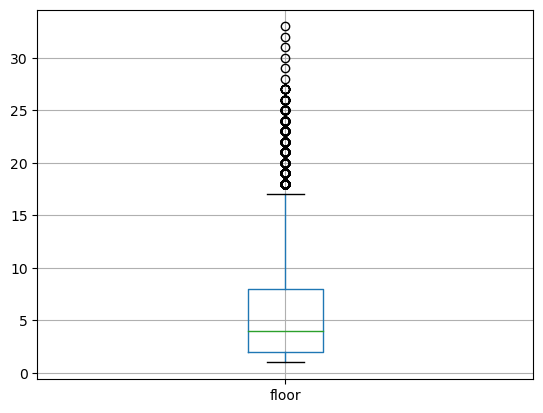

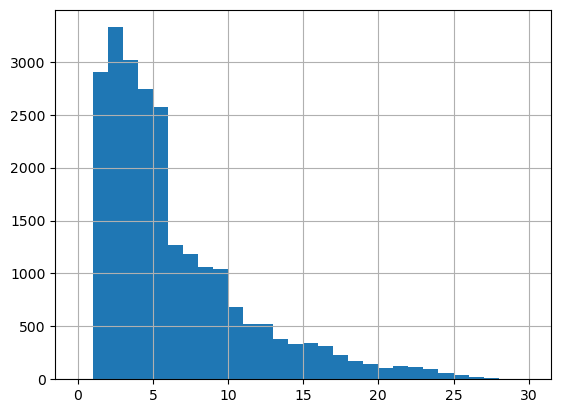

count    23351.000000
mean         5.901032
std          4.903507
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


In [20]:
parametr_analysis (df, 'floor', binsn=30, range_maxi=30)

**Flat floor** While in general there should be equal ammount of flats on every floor, and they should be announced with the same rate we already can make some conclusions about total amount of the floors. Most of the houses has 5-6 floors, big part has 9, higher buildings have more or less uniform distribution. This correlates with type-based buildings made in Soviet Union and less-typical building style characteristic for modern period of Russian history.

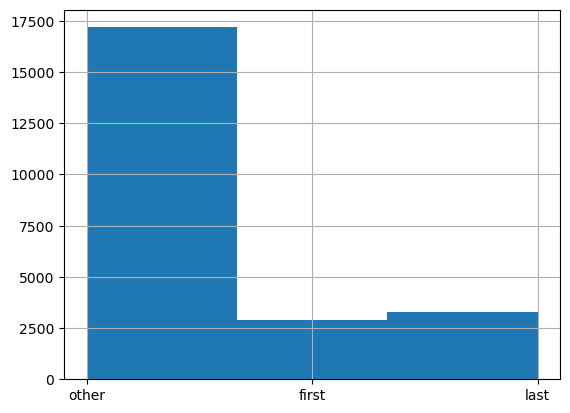

count     23351
unique        3
top       other
freq      17189
Name: floor_description, dtype: object

In [21]:
df['floor_description'].hist(bins=3)
plt.show()
df['floor_description'].describe()

**Floor type** Intriguingly, last-floor flats are being announced more often then on the first floor. This maybe related to the fact that on the first floor part of the appartements are oriented for commercial properties and have separated ways of distribution.

Analysis of floors_total


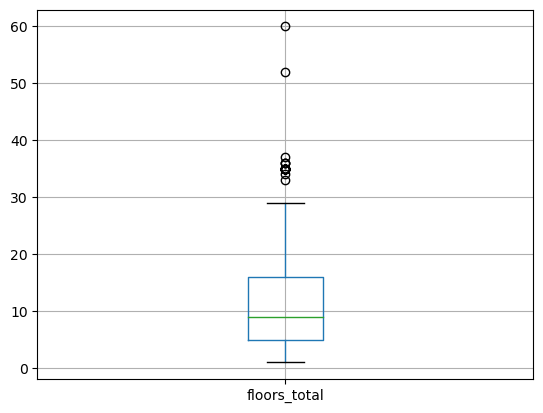

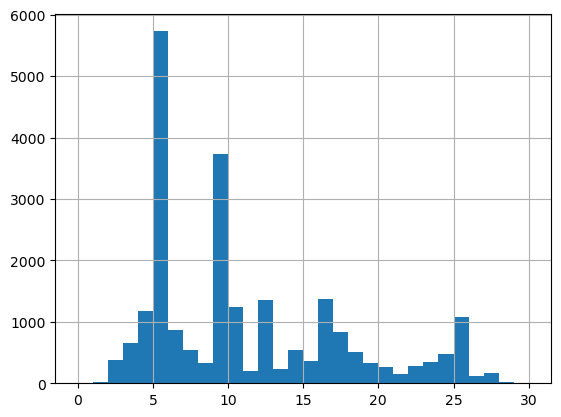

count    23351.000000
mean        10.714616
std          6.608599
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [22]:
parametr_analysis (df, 'floors_total', binsn=30, range_maxi=30)

**Total floors in the building** The data is related to the conclusions made on floors of the apartements being announced. Strong maxima are at 5 and 9 total floors. As well as at 16 and 25 which are less pronounced.

Analysis of cityCenters_nearest


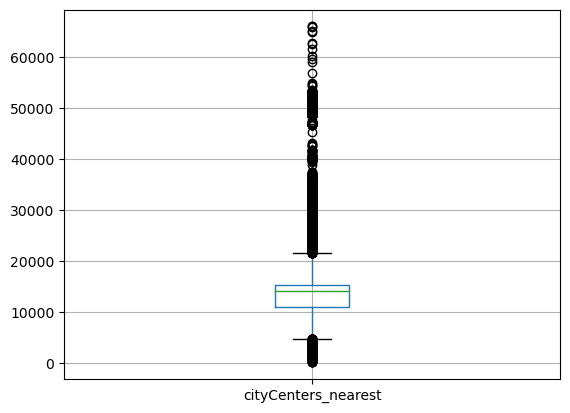

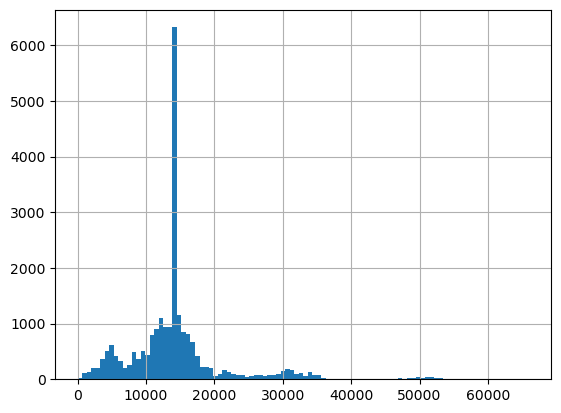

count    23351.000000
mean     14309.334338
std       7512.494410
min        208.000000
25%      11096.000000
50%      14191.277833
75%      15337.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [23]:
parametr_analysis (df, 'cityCenters_nearest', binsn=100, range_maxi=65968)

**Disctance to city center** There are 3 groups - 5 km, 15 km, and 30 km. A huge peak at median values is related to NaN replacement.

Analysis of airports_nearest


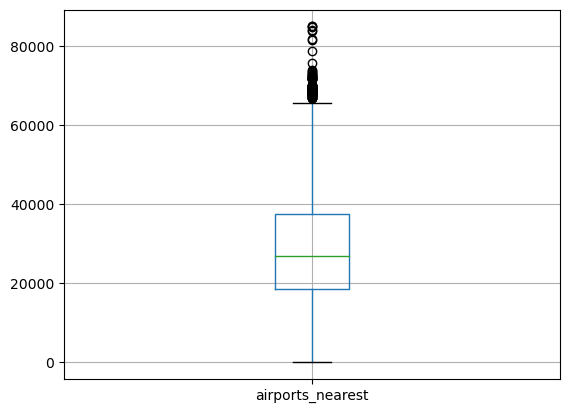

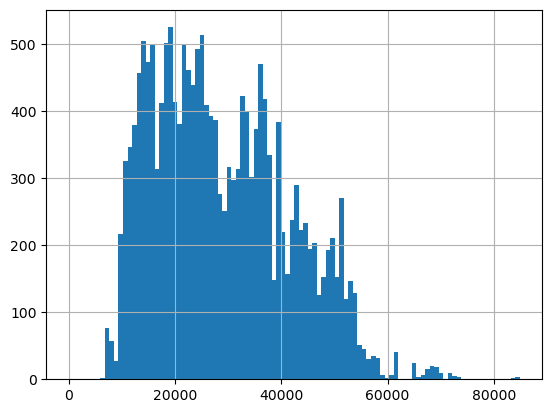

count    17838.000000
mean     28826.983126
std      12718.319184
min          0.000000
25%      18490.000000
50%      26770.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64


In [24]:
parametr_analysis (df, 'airports_nearest', binsn=100, range_maxi=84869)

**Distance to airport** has no pronounced maxima, which is probably related to the fact that while construction is oriented to the city center, it is not related to airport and, thus, has no trends related to it.

Analysis of parks_nearest


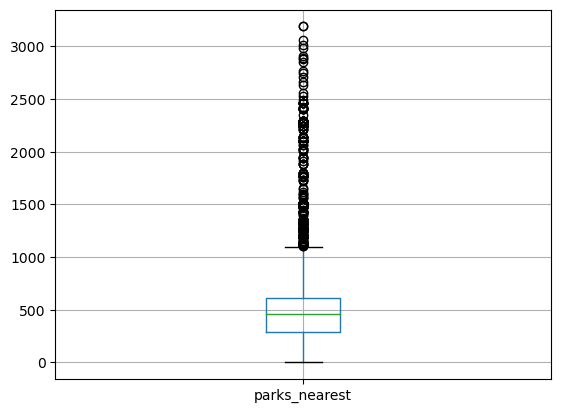

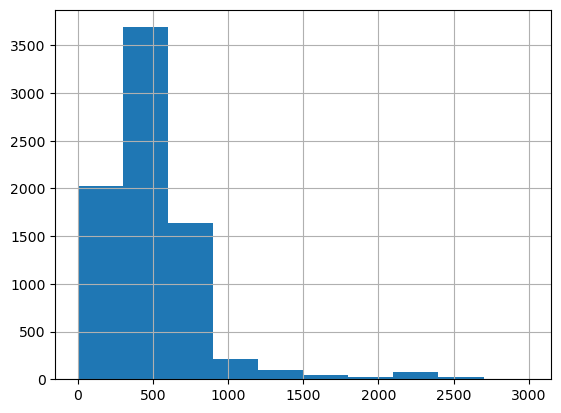

count    7840.000000
mean      493.709821
std       342.428770
min         1.000000
25%       290.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [25]:
parametr_analysis (df, 'parks_nearest', range_maxi=2999)

**Distance to the nearest park** If the park is around, it will be aproximately 0.5 km away.

Analysis of day


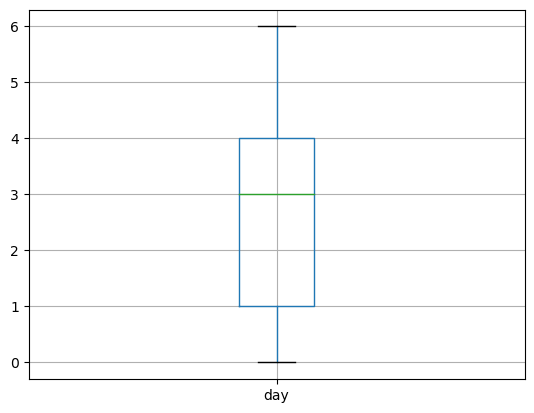

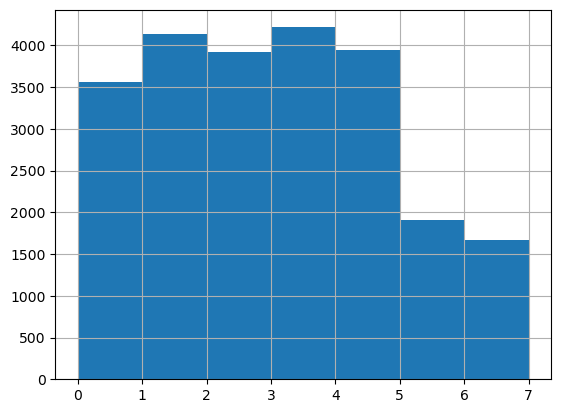

count    23351.000000
mean         2.567213
std          1.788953
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day, dtype: float64


In [26]:
parametr_analysis (df, 'day', 7, range_maxi=7)

Analysis of month


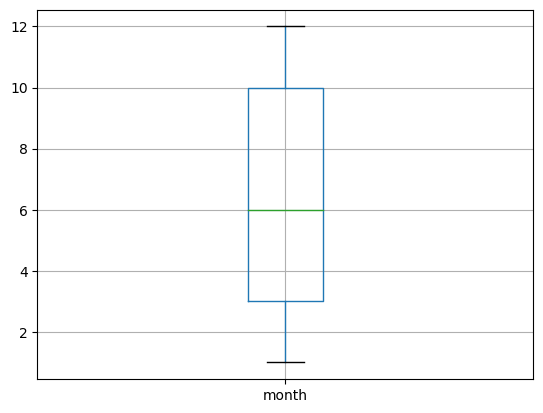

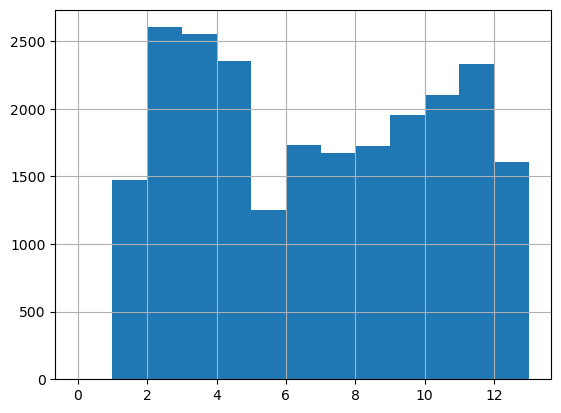

count    23351.000000
mean         6.398013
std          3.489960
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


In [27]:
parametr_analysis (df, 'month', 13,  range_maxi=13)

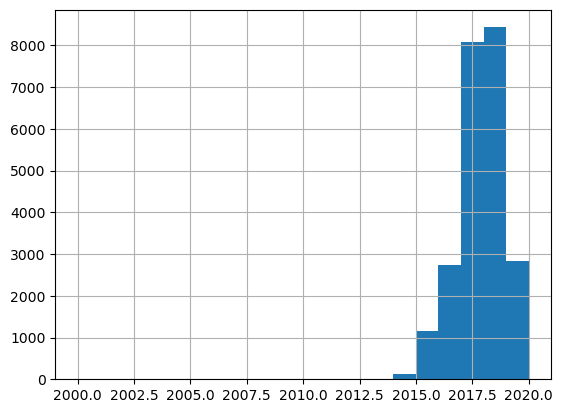

In [28]:
df['year'].hist(bins = 20, range=(2000, 2020))
plt.show()

**Time of publication** Most of the announcemnts are being made during workdays, in May and summer users are in general less active.

### Pattern analysis

#### Sale time

Analysis of days_exposition


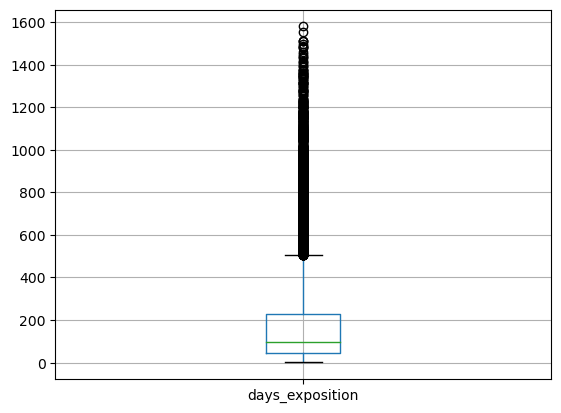

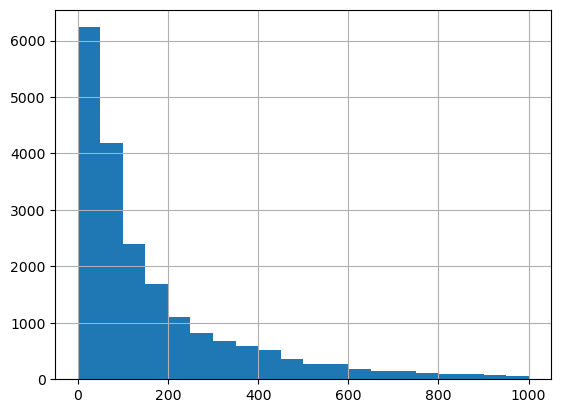

count    20264.000000
mean       179.429530
std        218.122832
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [29]:
parametr_analysis (df, 'days_exposition', 20,  range_maxi=1000)

**Celling time** It takes around 3 month to cell real-estate property.

#### Total area vs price

In [30]:
def pattern_analysis(main, price='last_price', second='meter_price'):
    print(f"Analysis for {main}")
    df.plot(x=price, y=main, kind='scatter')
    plt.show()
    df.plot(x=second, y=main, kind='scatter')
    plt.show()
    print(f"Correlation between {main} and {price}: {df[price].corr(df[main])}")
    print(f"Correlation between {main} and {second}: {df[second].corr(df[main])}")                                                 


Analysis for total_area


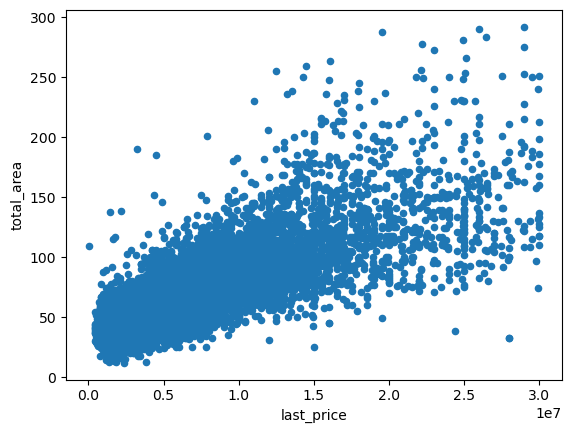

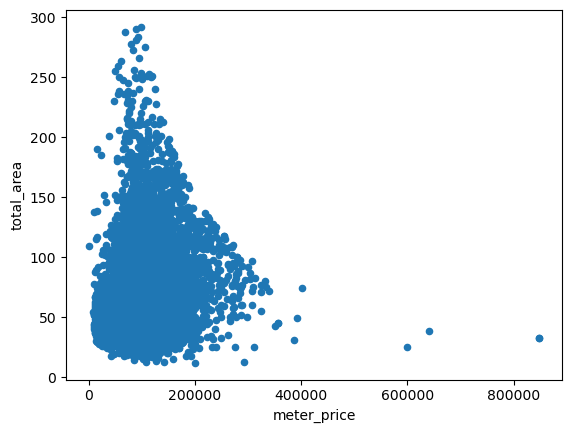

Correlation between total_area and last_price: 0.7913243139955188
Correlation between total_area and meter_price: 0.1318499129753045


In [31]:
pattern_analysis('total_area')

**Total area** has good positive correlation with price. But very poor correlation with price for square meter. Probably, due to different types of apartments which has high are (e.g. countryside houses and luxury apartments in city center).

#### Living area

Analysis for living_area


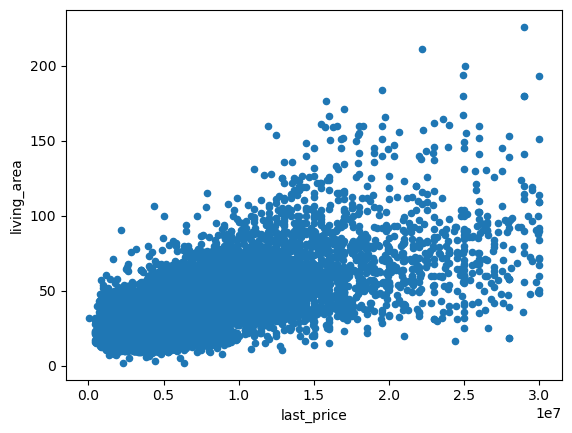

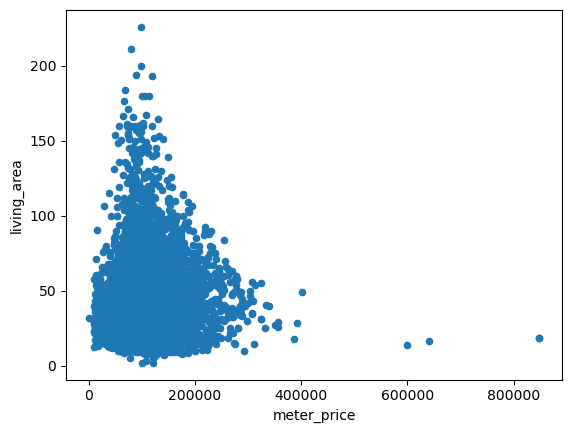

Correlation between living_area and last_price: 0.6937881207800247
Correlation between living_area and meter_price: 0.05046498052403111


In [32]:
pattern_analysis('living_area')

**Living area** similary to the total area has good correlation with the total price and poor with the price per sqm.

#### Kitchen area

Analysis for kitchen_area


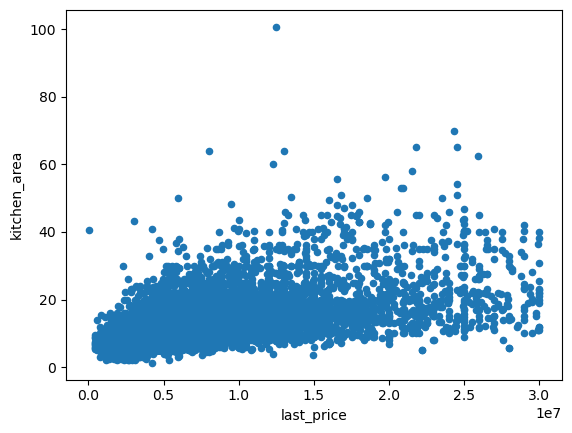

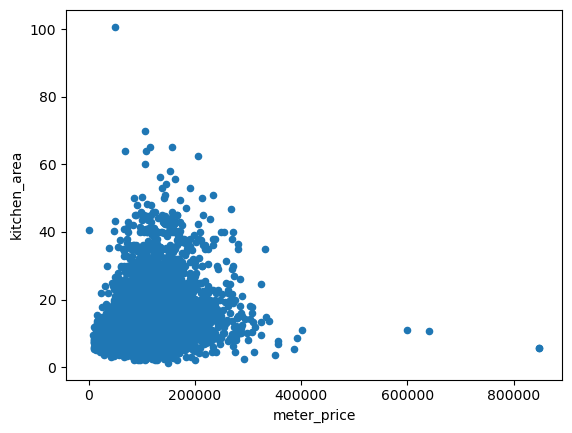

Correlation between kitchen_area and last_price: 0.6217317535036143
Correlation between kitchen_area and meter_price: 0.2950935297340396


In [33]:
pattern_analysis('kitchen_area')

**Kitchen area** has smaller impact on the total price, yet the correlation is pronounced.

#### Areas withc each other
It is worth to check how areas are correlated with each other in general.

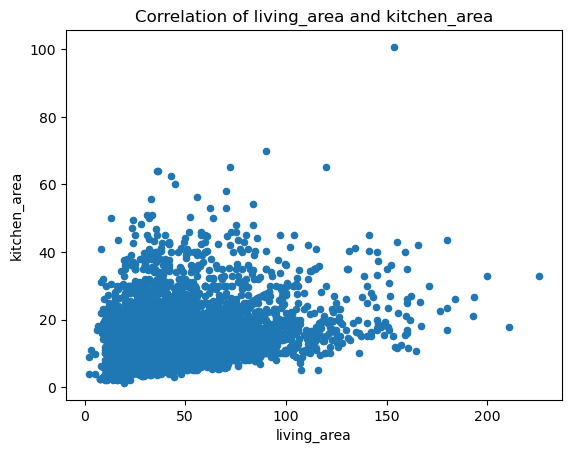

Correlation between living_area and kitchen_area: 0.40246704939111116


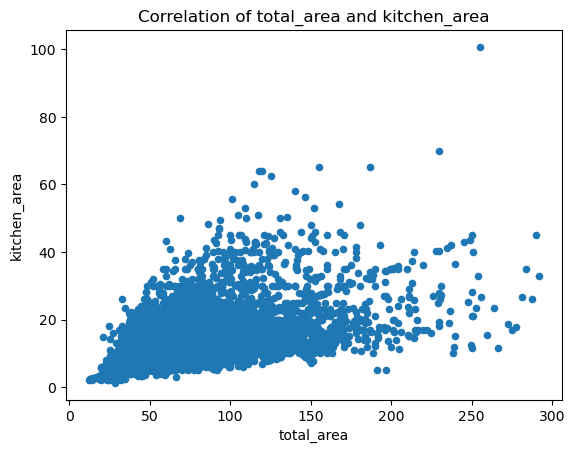

Correlation between total_area and kitchen_area: 0.6065677384750002


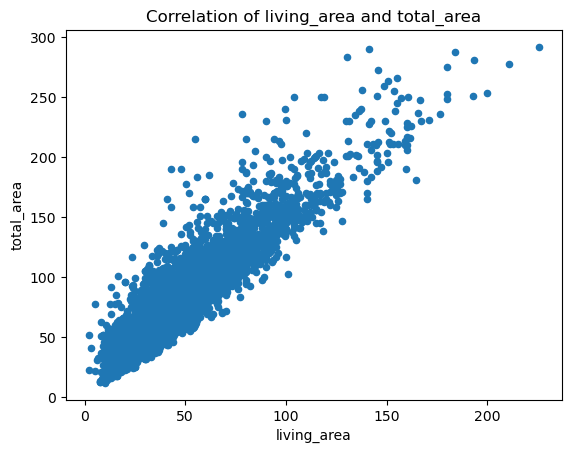

Correlation between living_area and total_area: 0.9353264930626201


In [34]:
def area_correlation(first, second):
    df.plot(x=first, y=second, kind='scatter')
    plt.title(f"Correlation of {first} and {second}")
    plt.show()
    print(f"Correlation between {first} and {second}: {df[first].corr(df[second])}")

area_correlation('living_area', 'kitchen_area')
area_correlation('total_area', 'kitchen_area')
area_correlation('living_area', 'total_area')          


In total, living area has strong positive correlation, while kitchen area has rather low correlation with total area, as it was also indicated in explorational analysis of the data. Living and kitchen area has rather small correlation.

#### Floor type

,last_price
floor_description,
first,4.544782e+06
last,5.538033e+06
other,5.963507e+06


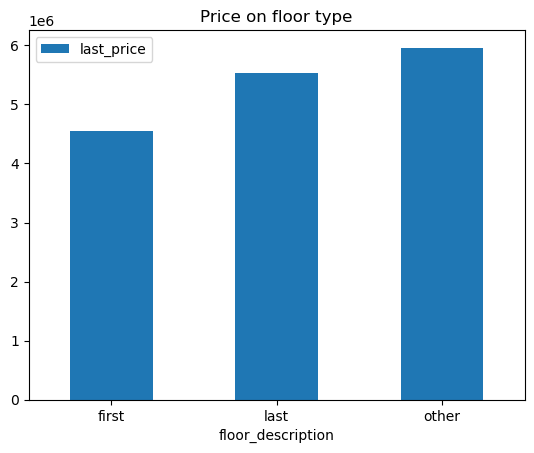

In [35]:
agg_table_floor = pd.pivot_table(df, values=['last_price'], index=['floor_description'], aggfunc=('mean'))
display(agg_table_floor)
agg_table_floor.plot(y ='last_price', kind='bar')
plt.xticks(rotation = 0)
plt.title('Price on floor type')
plt.show()

First-floor flats have lower prices then others, last is also less preferable.

#### Number of rooms

Analysis for rooms


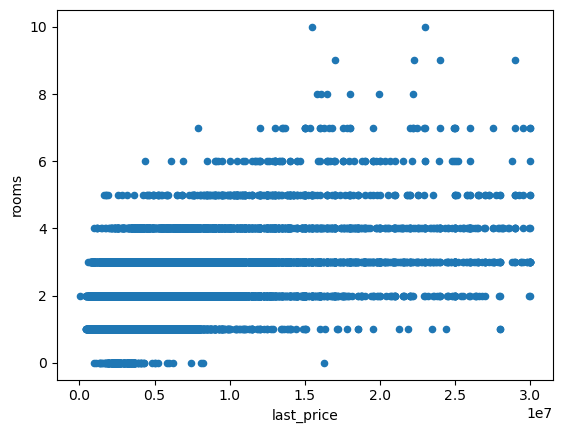

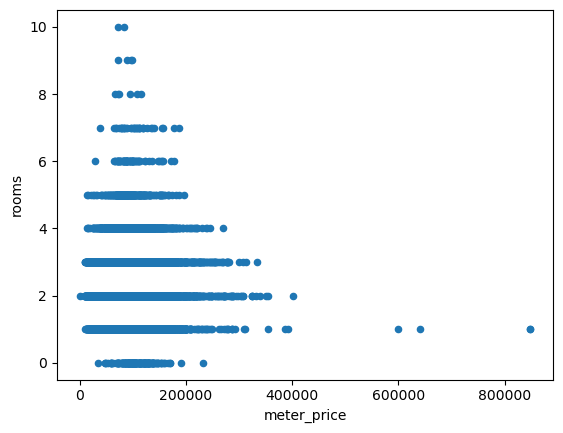

Correlation between rooms and last_price: 0.5182575924746129
Correlation between rooms and meter_price: -0.07018508190384308


In [36]:
pattern_analysis('rooms')


**Room number** has rather low impact on the total price and not at all on the price per sqm.  
This sounds a bit counter-intuitive, so we can check how it correlates with the total area and the living area.

Analysis for rooms


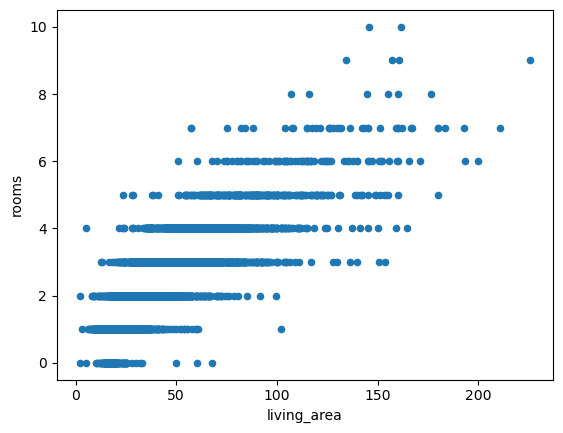

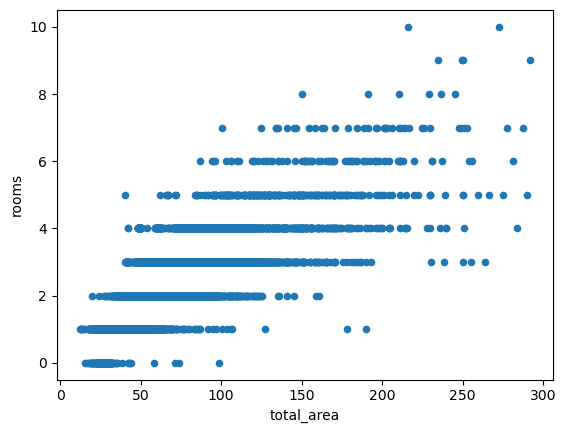

Correlation between rooms and living_area: 0.8647496919280191
Correlation between rooms and total_area: 0.7960046852948608


In [37]:
pattern_analysis('rooms', 'living_area', 'total_area')

As expected more rooms - more area, and while correlation of the price with the total area is rather pronounced, it is not the case with the number of rooms.

#### Time of announcement

In [38]:
def time_analysis(name):
    print(f"Analysis for {name}")
    agg_table = pd.pivot_table(df, values=['last_price'], index=[name], aggfunc=('mean'))
    display(agg_table)
    agg_table.plot(y ='last_price', kind='bar')
    plt.title(f"Price per {name}")
    plt.show()

Analysis for day


,last_price
day,
0,5.758167e+06
1,5.752429e+06
2,5.830036e+06
3,5.863273e+06
4,5.646490e+06
5,5.492469e+06
6,5.481073e+06


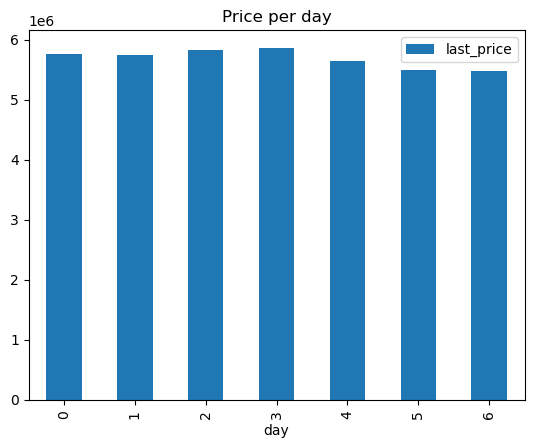

In [39]:
time_analysis('day')

Analysis for month


,last_price
month,
1,5.819337e+06
2,5.736348e+06
3,5.634613e+06
4,5.823860e+06
5,5.649539e+06
6,5.482429e+06
7,5.798351e+06
8,5.703969e+06
9,5.845335e+06


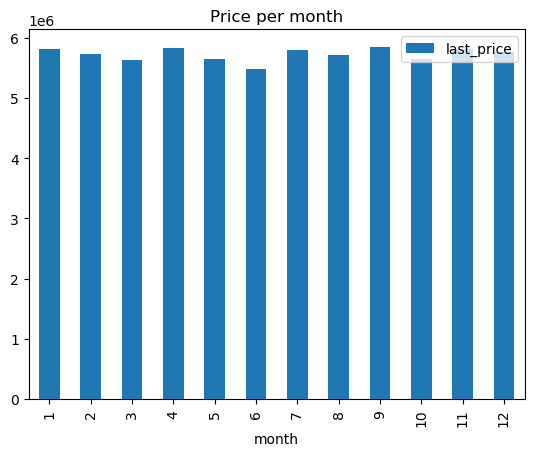

In [40]:
time_analysis('month')

Analysis for year


,last_price
year,
2014,9.578262e+06
2015,6.666907e+06
2016,5.723374e+06
2017,5.658117e+06
2018,5.508651e+06
2019,6.025823e+06


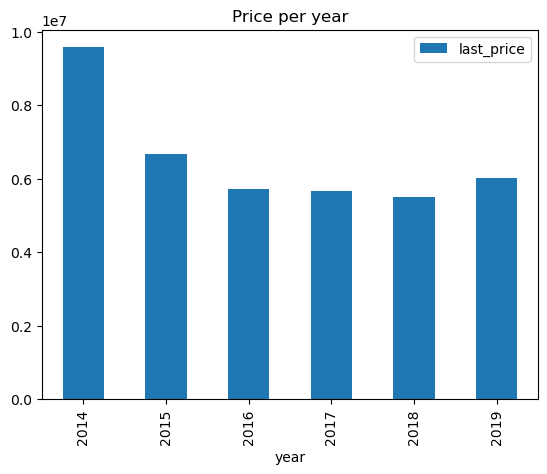

In [41]:
time_analysis('year')

Day, month, and year of announcement has neglectable impact on price. While for day and month it is expected, it is rather suspicious that prices do not get higher over years.

#### Time - Money
Is there relation between the price and the time that the anouncement appeared online?

Analysis for days_exposition


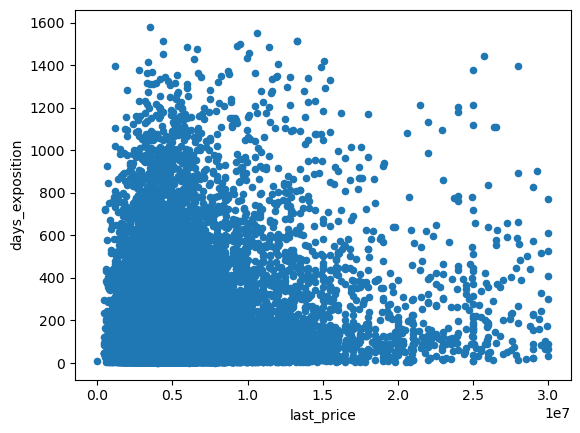

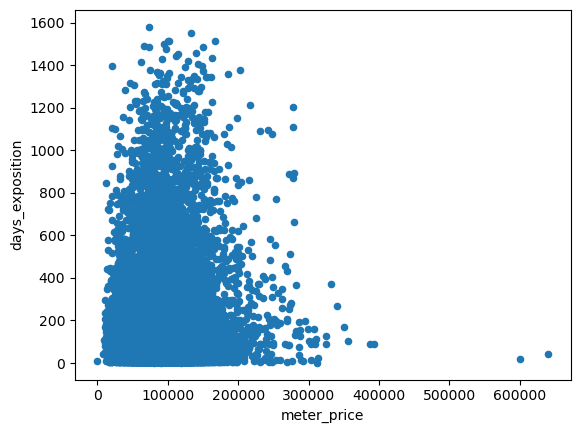

Correlation between days_exposition and last_price: 0.13434168479379982
Correlation between days_exposition and meter_price: 0.025386800910186465


In [42]:
pattern_analysis('days_exposition')

Apparently, there is no pronounced correlation between them. It would be important as well to monitor how price changes over days of exposition for each flat, yet, unfortunately, we do not have this data.

#### Price in different location
Considered for 10 most common towns.

In [43]:
agg_table = pd.pivot_table(df, values=['meter_price'], index=['locality_name'], aggfunc=('mean', 'count'))
agg_table = agg_table.sort_values(by=[('meter_price', 'count')], ascending=False)
display(agg_table.head(10))

meter_price               
                        count           mean
locality_name                               
Санкт-Петербург         15384  110545.002430
поселок Мурино            554   85607.423121
поселок Шушары            440   78677.364217
Всеволожск                398   68654.473986
Пушкин                    367  103130.851744
Колпино                   337   75333.295801
поселок Парголово         327   90175.913458
Гатчина                   307   68746.146763
деревня Кудрово           299   92473.547576
Выборг                    237   58141.909153

Among the most common cities the most expensive are "Санкт-Петербург", "Пушкин".  
The cheapest: "Выборг", "Гатчина" и "Всеволожск".

#### Price per distance from Saint-Petersburg center

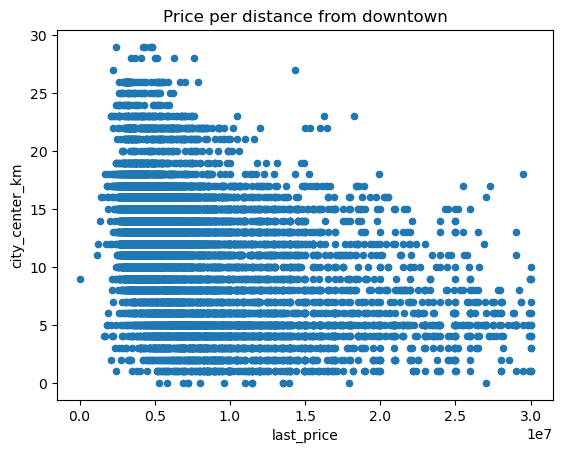

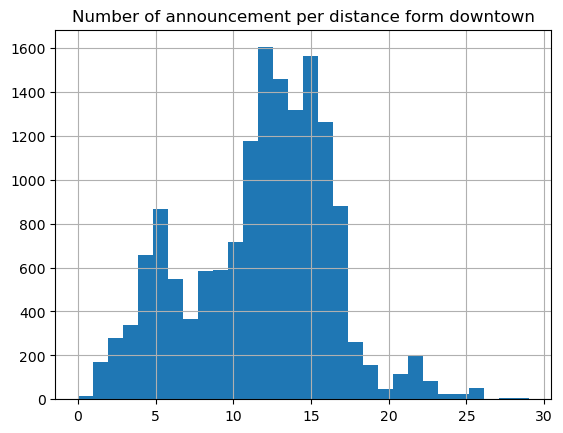

city_center_km
0     120644.997884
1     144236.171448
2     127525.216283
3     116992.284990
4     124763.953550
5     131603.441041
6     130608.550088
7     131238.750912
8     124266.248617
9     112241.040067
10    112753.103989
11    108044.709956
12    107493.370672
13    108148.127854
14    104924.172659
15    104181.011608
16    100480.724443
17     96601.846018
18     96392.000314
19     98652.736027
20    103045.181922
21     94469.584582
22     91330.425050
23     91828.517765
24     85736.904595
25     91531.371618
26     89285.876593
27    132115.709459
28     81161.915320
29     72953.365445
Name: meter_price, dtype: float64

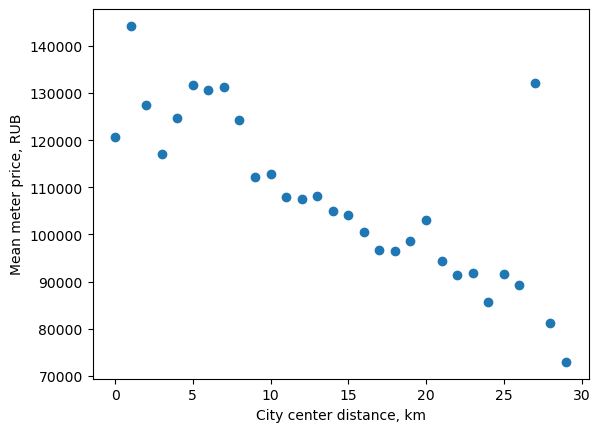

In [44]:
# Price per distance
df.loc[df['locality_name'] == 'Санкт-Петербург'].plot(x='last_price', y='city_center_km', kind='scatter')
plt.title('Price per distance from downtown')
plt.show()

# Announcment per distance
df.loc[df['locality_name'] == 'Санкт-Петербург'].hist(column='city_center_km', bins = 30)
plt.title('Number of announcement per distance form downtown')
plt.show()

#Representative price per distance
mean_meter_price_spb =(
        df.loc[df['locality_name'] == 'Санкт-Петербург'].groupby('city_center_km')['meter_price'].mean())

display(mean_meter_price_spb)

plt.plot(mean_meter_price_spb.index, mean_meter_price_spb.values, 'o')
plt.xlabel('City center distance, km')
plt.ylabel('Mean meter price, RUB')
plt.show()

As expected, there is good negative correlation between the distance from downtown and the price.  
There is an outliner at 27 km, indicating, probably an elite place for country-side houses.  
It may be also concluded that downtown itself has a radius around 7 km, as the price trend changes at this point.

### Conclusion

In this education notebook, we analyzed the real-estate market in Saint-Petersburg and its suburbs.
For this, data preprocessing was carried out: elimination of missing values, correction of data types, elimination of outliers.
Additional work was also carried out on the data - calculations of the cost per square meter, classification of floors, distances.
It was shown that although there are few obvious errors in the dataset, it is poorly filled, a large number of gaps can be successfully filled. According to indirect data, it can be assumed that the dataset is generated (as price per year does not change), so no one needs to be informed about this.
The processed data was carefully studied, regularities were derived and a typical property on the market was described (an apartment of about 52 square meters at a distance of 14 km from the center in a five- or nine-floor building at a price of 4.6 million rubles).
The parameters that have a significant impact on the price of the object were identified, among them: area (the most important parameter), distances to the center and, to a small extent, the floor.